## Visualizing models, data and training with TensorBoard 
refer) https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html

In [1]:
#imports 
import matplotlib.pyplot as plt 
import numpy as np 

import torch 
import torchvision 
import torchvision.transforms as transforms 

import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim 

# transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# datasets
trainset = torchvision.datasets.FashionMNIST('./FMNIST-data',
    download=True,
    train=True,
    transform=transform)
testset = torchvision.datasets.FashionMNIST('./FMNIST-data',
                                           download=True,
                                           train=False,
                                           transform=transform)

#dataloaders 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                         shuffle=True,num_workers=1)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False,num_workers=1)

#constant for classes 
classes = ('T-shirt.top','Trouser','Pullover','Dress','Coat','Sandal',
          'Shirt','Sneaker','Bag','Ankle Boot')

# helper function to show an image 
# (used in the 'plot_classed_preds' function below)
def matplotlib_imshow(img, one_channel=False):
    if one_channel : 
        img = img.mean(dim=0)
    img = img /2 +0.5  #unnormalize 
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg,(1,2,0)))
        
#model generation        
class Net(nn.Module): 
    def __init__(self):
        super(Net,self).__init__ ()
        self.conv1 = nn.Conv2d(1,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*4*4,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,x): 
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,16*4*4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x 
    
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

## A. TensorBoard setup
we’ll set up TensorBoard, importing tensorboard from torch.utils and defining a SummaryWriter, our key object for writing information to TensorBoard.

In [8]:
from torch.utils.tensorboard import SummaryWriter 

#default 'log_dir' is "runs"  
writer = SummaryWriter('runs/fashion_mnist_experiment_1')

Note that this line alone creates a runs/fashion_mnist_experiment_1 folder

## B. Writing to TensorBoard

let’s write an image to our TensorBoard - specifically, a grid - using make_grid.

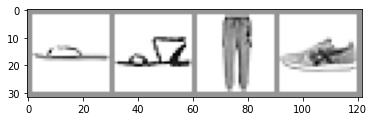

In [6]:
#get some random training images 
dataiter = iter(trainloader)
images,labels = dataiter.next()

#create grid of images 
img_grid = torchvision.utils.make_grid(images)

#show images 
matplotlib_imshow(img_grid, one_channel=True)

#write to tensorboard 
writer.add_image('four_fashion_mnist_images',img_grid)

In [10]:
#running 
#!tensorboard --logdir=runs

#from the command line and then navigating to https://localhost:6006 should show the following.

## C. Inspect the model using TensorBoard 
One of TensorBoard’s strengths is its ability to visualize complex model structures.

In [11]:
writer.add_graph(net,images)
writer.close()

## D. Adding a "projector" to TensorBoard
We can visualize the lower dimensional representation of higher dimensional data via the add_embedding method

In [ ]:
#helper function 
def select_n_random(data,labels, n=100):
    '''
    Select n random datapoints and their corresponding labels froma dataset
    '''
    assert len(data) == len(labels)
    perm = torch.randperm(len(data)) #Returns a random permutation of integers from 0 to n - 1
    return data[perm][:n],labels[perm][:n]

#select random images and their target indices
images, labels = select_n_random(trainset.data, trainset.targets)

#get the class labels for each image
class_labels = [classed[lab] for lab in labels]

#log embeddings
features = images(-1.28*28)
weiter.add_embedding(features,
                    metadata=class_labels,
                    label_img=images.unsqueeze(1))
writer.close()